# EDA

In [1]:
# Execute this cell and restart
!pip install -q pyLDAvis

     |████████████████████████████████| 1.7MB 11.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 39.6MB/s 
     |████████████████████████████████| 15.3MB 205kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import os
os._exit(00)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
path = '/content/drive/MyDrive/09.HACKATON_AI/01.NLP/02.DEMO/DATA/'
train_file = path + 'train.csv'
test_file = path + 'test_descriptions.csv'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
train.head(3)

,name,description
0,CROPPED JACKET TRF,Jacket made of a technical fabric with texture...
1,OVERSIZED SHIRT WITH POCKET TRF,Oversized long sleeve shirt with a round colla...
2,TECHNICAL TROUSERS TRF,High-waist trousers with a matching elastic wa...


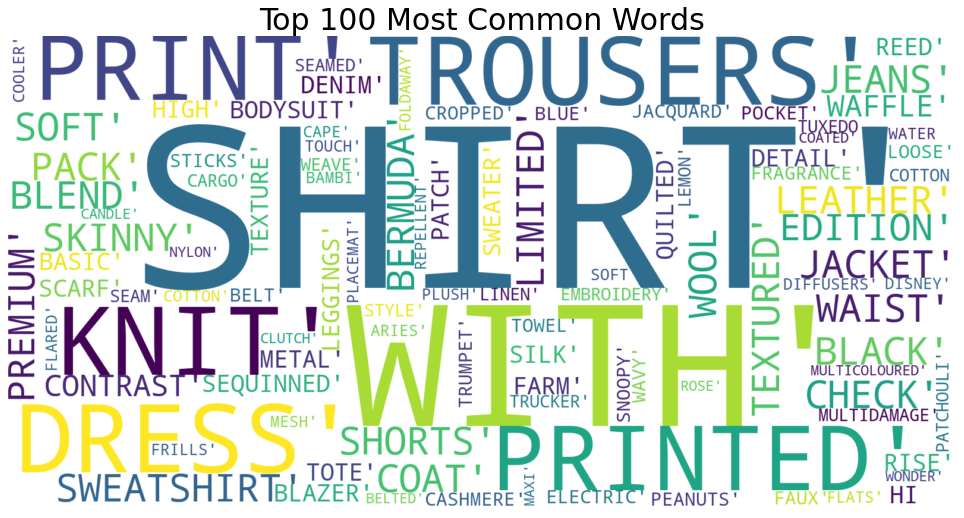

In [3]:
df = pd.DataFrame()
df['name'] = train.sample(100).name.copy()

str_all_words = ""
for index, row in df.iterrows():
    str_all_words +=  df.name[index] + ' '
str_all_words
aux = str_all_words

text_tokens = word_tokenize(str_all_words)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

tokens_without_sw = [x for x in tokens_without_sw if len(x) > 3]

mostcommon = FreqDist(tokens_without_sw).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(15,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

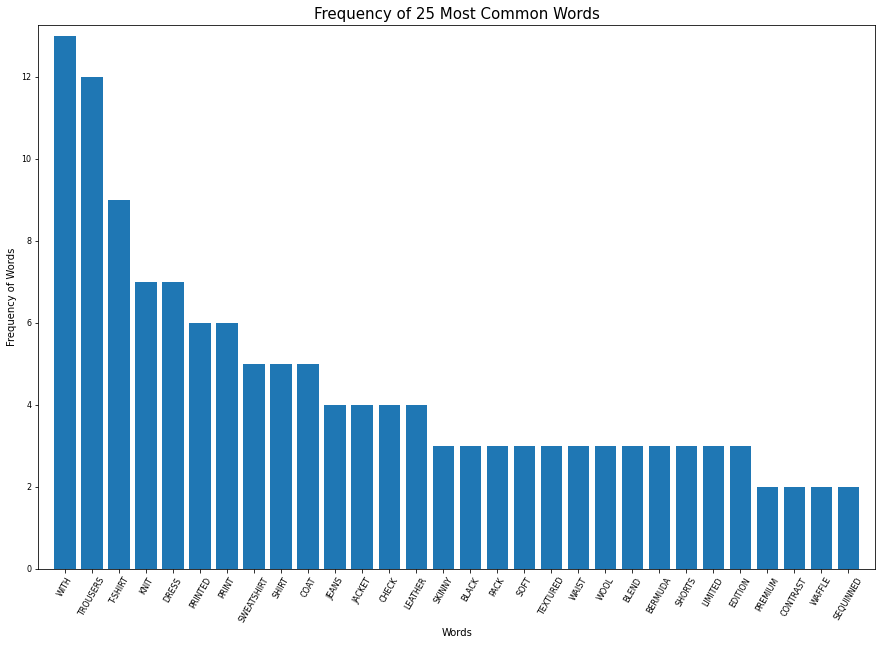

In [5]:
mostcommon_small = FreqDist(tokens_without_sw).most_common(30)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(15,10))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=8)
plt.xticks(rotation=60, fontsize=8)
plt.title('Frequency of 25 Most Common Words', fontsize=15)
plt.show()

## Topic modelling

In [6]:
df = pd.DataFrame()
df['description'] = train[0:1000].description.copy()

tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['description'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix.sample(3)

,177,69,adjustable,all,an,and,appliqué,appliqués,at,back,belt,blend,bodysuit,bottom,bow,br,button,buttoned,by,chest,cm,collar,collared,contrast,crop,cropped,cuffed,cuffs,detail,disney,drawstrings,dress,elastic,fabric,fastening,featuring,fit,fitting,front,height,...,pack,pairs,patch,pocket,pockets,print,puff,ribbed,round,ruffle,ruffled,shirt,short,shorts,shoulder,side,skirt,sleeve,sleeveless,sleeves,slogan,snap,socks,straight,straps,sweater,sweatshirt,the,thin,tied,top,trim,trims,trousers,up,waist,waistband,wide,with,zip
801,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
404,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
13,1,0,0,0,1,2,0,0,1,1,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0


In [7]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 30

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
front with and sleeves button long up fastening featuring the zip collar pockets shirt cuffs collared hood fit by at high jacket hem side fabric short buttoned snap dress elastic
Topic 1:
front pocket patch chest and pockets print featuring slogan appliqué hems cuffed with bow contrast fit on back adjustable side the button up hood elastic fastening sleeve at detail knit
Topic 2:
elastic an and with waistband waist front trousers high pockets featuring side adjustable hems drawstrings shorts skirt cuffed the back fastening zip button at belt midi hem matching appliqué up
Topic 3:
long with and sleeves trims round sweatshirt neck ribbed neckline sweater sleeve knit print featuring contrast detail ruffle high hem cropped appliqués puff fabric collar fit front loose fitting appliqué
Topic 4:
an elastic with and print waistband all over leggings ribbed trim knit socks featuring puff bow ruffle appliqué hems cuffs side up appliqués the detail shorts back hem adjustable front
Topic 

In [8]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/l

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      32.420952   8.115230       1        1  17.603888
5       0.648955  71.707100       2        1  17.361033
0      71.019684   9.971006       3        1  12.514506
3       3.785981  33.185135       4        1  12.298630
8     -42.666500  -9.222070       5        1   9.924751
2      -3.621689 -43.526516       6        1   9.834462
6      -3.632402  -4.171708       7        1   9.643027
4     -36.584400  35.804413       8        1   4.121068
9      44.391380  50.615383       9        1   3.965726
1      40.235809 -31.591665      10        1   2.732909, topic_info=         Term        Freq       Total Category  logprob  loglift
15         br  658.000000  658.000000  Default  30.0000  30.0000
58         of  341.000000  341.000000  Default  29.0000  29.0000
38      front  399.000000  399.000000  Default  28.0000  28.0000
4          an  208.000000  208.000000  Default  27.0000  27.0000
32    elastic  251.000000  251.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
34  fastening    0.119874  182.731805  Topic10  -8.0405  -3.7295
79     sleeve    0.119874  153.245404  Topic10  -8.0405  -3.5536
8          at    0.119873  179.046427  Topic10  -8.0405  -3.7092
28     detail    0.119872  192.120971  Topic10  -8.0405  -3.7797
46       knit    0.119871   78.560773  Topic10  -8.0405  -2.8854

[397 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.995229         177
1         1  0.996842          69
2         3  0.181119  adjustable
2         6  0.603729  adjustable
2         7  0.150932  adjustable
...     ...       ...         ...
100       8  0.050321        with
100       9  0.062901        with
101       3  0.663151         zip
101       6  0.189472         zip
101       7  0.142104         zip

[274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 1, 4, 9, 3, 7, 5, 10, 2])

## Prepare Data

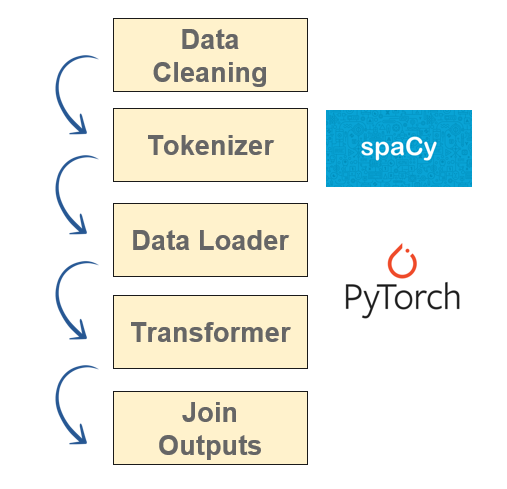

In [9]:
import re
from sklearn.model_selection import train_test_split


def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    # sentence = re.sub('[0-9]', '0', sentence)

    # Single character removal
    sentence = sentence.translate ({ord(c): " " for c in "!@#$^&*()[]{};:,/<>?|`~-=_+″′"})

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    #Summarize with Bert
    #sentence = summariz(sentence, ratio=0.6)

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


def clean_data(dataset):
    dataset = dataset[['description', 'name']]
    dataset = dataset.rename(columns={'description':'src','name':'trg'})

    description_prep = []
    for index, row in enumerate(dataset.src):
        description_prep.append(preprocess_text(row))

    dataset['src'] = description_prep
    return dataset


def split_data():
    train = pd.read_csv(path + 'train.csv')
    train, val = train_test_split(train, test_size=0.04, random_state=42)
    val, test = train_test_split(val, test_size=0.18, random_state=42)

    train = clean_data(train)
    val = clean_data(val)
    test = clean_data(test)

    train.to_csv(path + 'generate_train.csv', index=False)
    val.to_csv(path + 'generate_val.csv', index=False)
    test.to_csv(path + 'generate_test.csv', index=False)

split_data()

# MODEL

In [10]:
!python -m spacy download de
!pip install -q torchtext==0.6.0

PATH = '/content/drive/MyDrive/09.HACKATON_AI/01.NLP/02.DEMO/'
pd.set_option('display.max_colwidth', -1)

import os
os.chdir(PATH)
from utils import translate_sentence, save_checkpoint, load_checkpoint
# os.chdir('/content')

import torch
import torch.nn as nn
import torch.optim as optim
import spacy
import numpy as np

from torch.utils.tensorboard import SummaryWriter
from torchtext.data import Field, BucketIterator
from sklearn.model_selection import train_test_split
import torchtext
import pandas as pd

     |████████████████████████████████| 14.9MB 10.9MB/s 
  Created wheel for de-core-news-sm: filename=de_core_news_sm-2.2.5-cp37-none-any.whl size=14907057 sha256=c865878885c3c8bf1e7011c2fc2fce58db5326e1e09d83bd81fa5805c9c847cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-3nwnlofx/wheels/ba/3f/ed/d4aa8e45e7191b7f32db4bfad565e7da1edbf05c916ca7a1ca
Successfully built de-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/de_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/de
You can now load the model via spacy.load('de')
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 1.2MB 8.8MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """
/usr/local/lib/python3.7/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)
/usr/local/lib/python3.7/dist-packages/cupy/__init__.py:229: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20

## Build Vocabulary

In [11]:
import pickle
spacy_eng = spacy.load("en")

def save_vocab(vocab, path):
    import pickle
    output = open(path, 'wb')
    pickle.dump(vocab, output)
    output.close()

def tokenize_eng(text):
    return [tok.text for tok in spacy_eng.tokenizer(text)]


def generate_vocabs(load=True):
    
    desc_vocab = Field(tokenize=tokenize_eng, lower=True, init_token="<sos>", eos_token="<eos>")
    name_vocab = Field(tokenize=tokenize_eng, lower=True, init_token="<sos>", eos_token="<eos>")


    data_fields = [('src', desc_vocab), ('trg', name_vocab)]
    train_data, valid_data, test_data = torchtext.data.TabularDataset.splits(path=PATH + 'DATA/', 
                                                                            train='generate_train.csv', validation='generate_val.csv', test='generate_test.csv', 
                                                                            format='csv', fields=data_fields,skip_header=True)
    if load == False:
        print("Generating new diccionary needs of train new models!!")
        desc_vocab.build_vocab(train_data, max_size=10000, min_freq=1)
        name_vocab.build_vocab(train_data, max_size=10000, min_freq=1)

        # save_vocab(desc_vocab, PATH + '/MODELS/desc_vocab.pickle')
        # save_vocab(name_vocab, PATH + '/MODELS/name_vocab.pickle')

    else:
        desc_vocab = pickle.load(open(PATH + '/MODELS/desc_vocab.pkl','rb'))
        name_vocab = pickle.load(open(PATH + '/MODELS/name_vocab.pkl','rb'))
        

    print('palabras de los nombres: ' + str(len(name_vocab.vocab.freqs)))
    print('palabras de las descripciones: ' + str(len(desc_vocab.vocab.freqs)))

    return desc_vocab, name_vocab, train_data, valid_data, test_data

desc_vocab, name_vocab, train_data, valid_data, test_data = generate_vocabs(load=False)


Generating new diccionary needs of train new models!!
palabras de los nombres: 3700
palabras de las descripciones: 7746


## Define the Transformers

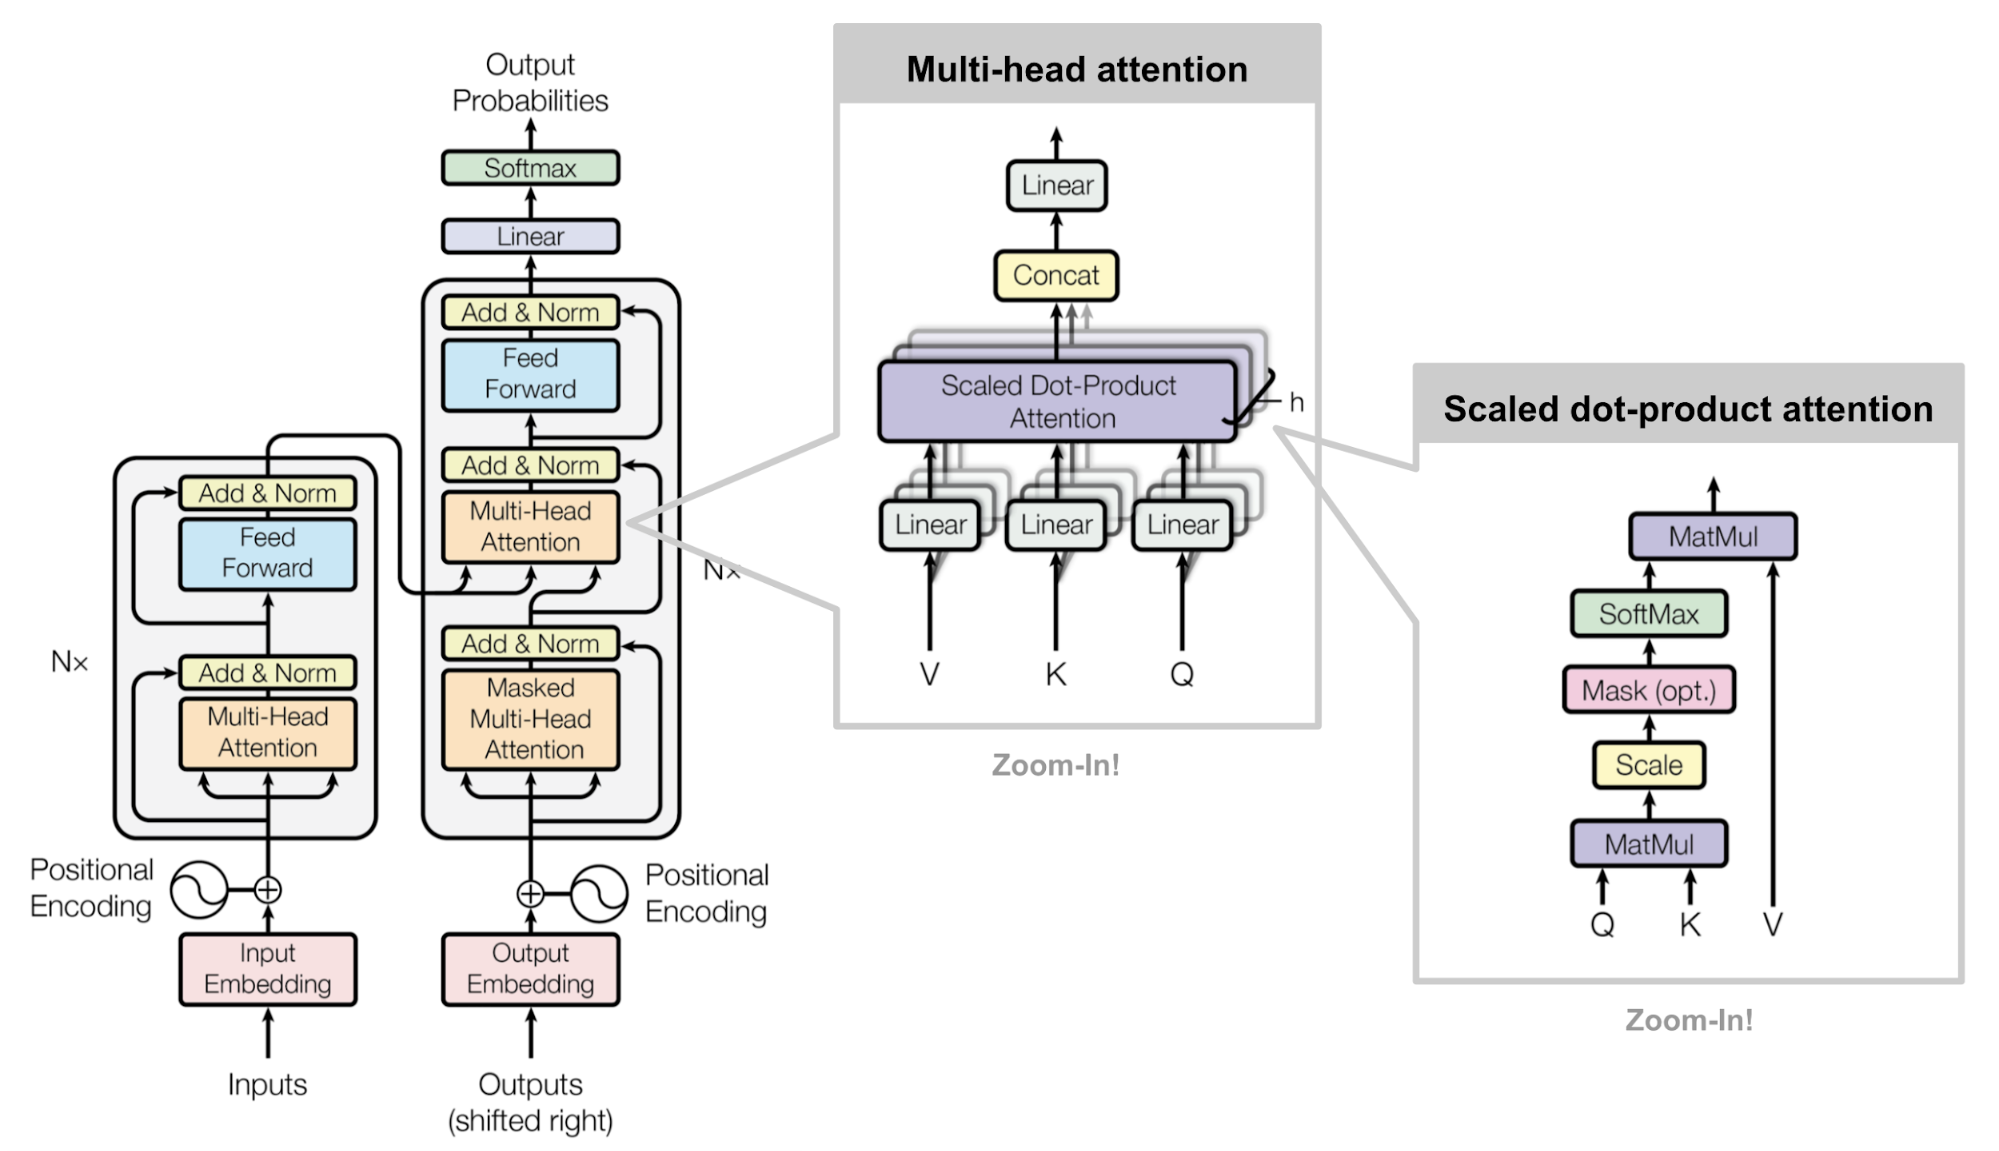

In [12]:
class Transformer(nn.Module):
    def __init__(
        self,
        embedding_size,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        forward_expansion,
        dropout,
        max_len,
        device,
    ):
        super(Transformer, self).__init__()
        self.src_word_embedding = nn.Embedding(src_vocab_size, embedding_size)
        self.src_position_embedding = nn.Embedding(max_len, embedding_size)
        self.trg_word_embedding = nn.Embedding(trg_vocab_size, embedding_size)
        self.trg_position_embedding = nn.Embedding(int(max_len/8), embedding_size)

        self.device = device
        self.transformer = nn.Transformer(
            embedding_size,
            num_heads,
            num_encoder_layers,
            num_decoder_layers,
            forward_expansion,
            dropout,
        )
        self.fc_out = nn.Linear(embedding_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.src_pad_idx = src_pad_idx

    def make_src_mask(self, src):
        src_mask = src.transpose(0, 1) == self.src_pad_idx

        # (N, src_len)
        return src_mask.to(self.device)

    def forward(self, src, trg):
        src_seq_length, N = src.shape
        trg_seq_length, N = trg.shape

        src_positions = (
            torch.arange(0, src_seq_length)
            .unsqueeze(1)
            .expand(src_seq_length, N)
            .to(self.device)
        )

        trg_positions = (
            torch.arange(0, trg_seq_length)
            .unsqueeze(1)
            .expand(trg_seq_length, N)
            .to(self.device)
        )

        embed_src = self.dropout(
            (self.src_word_embedding(src) + self.src_position_embedding(src_positions))
        )
        embed_trg = self.dropout(
            (self.trg_word_embedding(trg) + self.trg_position_embedding(trg_positions))
        )

        src_padding_mask = self.make_src_mask(src)
        trg_mask = self.transformer.generate_square_subsequent_mask(trg_seq_length).to(
            self.device
        )

        out = self.transformer(
            embed_src,
            embed_trg,
            src_key_padding_mask=src_padding_mask,
            tgt_mask=trg_mask,
        )
        out = self.fc_out(out)
        return out


In [13]:
# We're ready to define everything we need for training our Seq2Seq model

def train_transformer(num_epochs,
                      learning_rate,
                      batch_size,
                      embedding_size,
                      num_heads,
                      num_encoder_layers,num_decoder_layers,
                      dropout,
                      max_len,
                      forward_expansion,
                      model_name):
  

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    load_model = False
    save_model = True

    # Training hyperparameters
    num_epochs = num_epochs
    learning_rate = learning_rate
    batch_size = batch_size

    # Model hyperparameters
    src_vocab_size = len(desc_vocab.vocab)
    trg_vocab_size = len(name_vocab.vocab)
    embedding_size = embedding_size
    num_heads = num_heads
    num_encoder_layers = num_encoder_layers
    num_decoder_layers = num_encoder_layers
    dropout = dropout
    max_len = max_len
    forward_expansion = forward_expansion
    src_pad_idx = name_vocab.vocab.stoi["<pad>"]

    # Tensorboard to get nice loss plot
    writer = SummaryWriter("runs/loss_plot")
    step = 0

    train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
        (train_data, valid_data, test_data),
        batch_size=batch_size,
        sort_within_batch=True,
        sort_key=lambda x: len(x.src),
        device=device,
    )

    model = Transformer(
        embedding_size,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        forward_expansion,
        dropout,
        max_len,
        device,
    ).to(device)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, factor=0.1, patience=10, verbose=True
    )

    pad_idx = name_vocab.vocab.stoi["<pad>"]
    criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)

    if load_model:
        load_checkpoint(torch.load(model_name), model, optimizer)

    # sentence = "Quilted jacket featuring a ribbed collar long sleeves with elastic cuffs front zip pockets an inside pocket ribbed hem and a zip up front."
    sentence = "Cotton placemat featuring a horizontal design with broken stripes on a herringbone background. Sold in packs of 2." #  NAME = STRIPED COTTON PLACEMAT (PACK OF 2)

    for epoch in range(num_epochs):
        print(f"[Epoch {epoch} / {num_epochs}]")

        if save_model:
            checkpoint = {
                "state_dict": model.state_dict(),
                "optimizer": optimizer.state_dict(),
            }
            save_checkpoint(checkpoint, filename=model_name)

        model.eval()
        translated_sentence = translate_sentence(
            model, sentence, desc_vocab, name_vocab, device, max_length=50
        )

        print(f"Translated example sentence: \n {translated_sentence}")
        model.train()
        losses = []

        for batch_idx, batch in enumerate(train_iterator):
            # Get input and targets and get to cuda
            inp_data = batch.src.to(device)
            target = batch.trg.to(device)

            # Forward prop
            output = model(inp_data, target[:-1, :])

            # Output is of shape (trg_len, batch_size, output_dim) but Cross Entropy Loss
            # doesn't take input in that form. For example if we have MNIST we want to have
            # output to be: (N, 10) and targets just (N). Here we can view it in a similar
            # way that we have output_words * batch_size that we want to send in into
            # our cost function, so we need to do some reshapin.
            # Let's also remove the start token while we're at it
            output = output.reshape(-1, output.shape[2])
            target = target[1:].reshape(-1)

            optimizer.zero_grad()

            loss = criterion(output, target)
            losses.append(loss.item())

            # Back prop
            loss.backward()
            # Clip to avoid exploding gradient issues, makes sure grads are
            # within a healthy range
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

            # Gradient descent step
            optimizer.step()

            # plot to tensorboard
            writer.add_scalar("Training loss", loss, global_step=step)
            step += 1

        mean_loss = sum(losses) / len(losses)
        scheduler.step(mean_loss)


def load_transformer(num_epochs,
                     learning_rate,
                     batch_size,
                     embedding_size,
                     num_heads,
                     num_encoder_layers,
                     num_decoder_layers,
                     dropout,
                     max_len,
                     forward_expansion,
                     model_name):



    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Training hyperparameters
    num_epochs = num_epochs
    learning_rate = learning_rate
    batch_size = batch_size

    # Model hyperparameters
    src_vocab_size = len(desc_vocab.vocab) 
    trg_vocab_size = len(name_vocab.vocab) 
    embedding_size = embedding_size
    num_heads = num_heads
    num_encoder_layers = num_encoder_layers
    num_decoder_layers = num_encoder_layers
    dropout = dropout
    max_len = max_len
    forward_expansion = forward_expansion
    src_pad_idx = name_vocab.vocab.stoi["<pad>"]


    model = Transformer(
        embedding_size,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        forward_expansion,
        dropout,
        max_len,
        device,
    ).to(device)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, factor=0.1, patience=10, verbose=True
    )
    load_checkpoint(torch.load(model_name), model, optimizer)
    return model,device

In [16]:
hyperparameters_0={'num_epochs':20,
                  'learning_rate':3e-4,
                  'batch_size':164,
                  'embedding_size':168,
                  'num_heads':8,
                  'num_encoder_layers':4,
                  'num_decoder_layers':4,
                  'dropout':0.10,
                  'max_len':400,
                  'forward_expansion':8,
                  'model_name':"MODELS/transformer_0.pth.tar"}

In [17]:
train_transformer(**hyperparameters_0)

[Epoch 0 / 20]
=> Saving checkpoint
Translated example sentence: 
 ['sandy', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', 'shearling', 'cloud', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28']
[Epoch 1 / 20]
=> Saving checkpoint
Translated example sentence: 
 ['textured', 'of', 'of', 'of', 'of', 'of', 'of', 'of', 'of', 'of', '<eos>']
[Epoch 2 / 20]
=> Saving checkpoint
Translated example sentence: 
 ['pack', 'of', 'pack', 'of', '2', ')', '<eos>']
[Epoch 3 / 20]
=> Saving checkpoint
Translated example sentence: 
 ['cotton', 'cotton', '(', 'pack', 'of', '2', ')', '<eos>']
[Epoch 4 / 20]
=> Saving checkpoint
Translated example sentence: 
 ['cotton', 'cotton', 'napkin', '(', 'pack', 'of', '2', ')', '<eos>']
[Epoch 5 / 20]
=> Saving checkpoint
Translated example sentence: 
 ['cotton', 'placemat', 'with', '

In [18]:
model_0, device = load_transformer(**hyperparameters_0)

=> Loading checkpoint


In [22]:
val = pd.read_csv(PATH + 'DATA/generate_test.csv')
val = val[:30]
def validation_model(val, model):
    print("Prediction for val dataset: ")
    results = []
    for index, row in enumerate(val.src):
        name_predicted = translate_sentence(model, row, desc_vocab, name_vocab, device, max_length=50)
        name_concatenated = ' '.join(name_predicted[:-1])
        results.append(name_concatenated)
        # print(name_concatenated)


    df_val_result = pd.DataFrame(results)
    df_val_result = df_val_result.rename(columns={0:'predicted_name'})
    df_val_result['predicted_name'] = df_val_result['predicted_name'].str.upper()
    df_val_result['predicted_name'] = df_val_result['predicted_name'].str.replace( " - ","-" )
    df_val_result['predicted_name'] = df_val_result['predicted_name'].str.replace( r" \( "," (" )
    df_val_result['predicted_name'] = df_val_result['predicted_name'].str.replace( r" \)",")" )
    df_val_result['predicted_name'] = df_val_result['predicted_name'].str.replace( " '"," '" )
    df_val_result['predicted_name'] = df_val_result['predicted_name'].str.replace( " © "," ©" )
    df_val_result['predicted_name'] = df_val_result['predicted_name'].str.replace( " ’S ","’S " )


    df_val_result['original_name'] = list(val['trg'])
    df_val_result['original_desc'] = list(val['src'])
    df_val_result['acierto'] = df_val_result['predicted_name']==df_val_result['original_name']

    df_aciertos = df_val_result.loc[df_val_result['acierto'] == True]
    print('El modelo ha acertado: ' + str(len(df_aciertos)))
    print('Un total de un ' + str(len(df_aciertos)/len(df_val_result)*100) + '%')
    df_fallos = df_val_result.loc[df_val_result['acierto'] == False]

    return df_aciertos, df_fallos

In [23]:
df_aciertos, df_fallos = validation_model(val, model_0)

Prediction for val dataset: 
El modelo ha acertado: 2
Un total de un 6.666666666666667%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


In [24]:
df_aciertos

,predicted_name,original_name,original_desc,acierto
16,BLACK VANILLA LIQUID HAND SOAP (250 ML),BLACK VANILLA LIQUID HAND SOAP (250 ML),This fragrance comprises a unique mix of delicious notes with vanilla praline as the star. A delicate floral blend and vibrant touches of citrus give life to the fragrance lending an addictive and seductive sensory experience. Main aromatic notes PRALINE MILK MUSK FRUIT CITRUS VANILLA.Liquid hand soap in a transparent container with dispenser. It contains aloe vera and glycerine extracts to help hydrate and soften the skin. Made in the EU.,True
26,JOGGER WAIST TROUSERS,JOGGER WAIST TROUSERS,Mid waist skinny trousers with an elastic waistband in the back. Featuring front pockets false rear welt pockets side vents at the hems and metal hook and zip fastening in the front.HEIGHT OF MODEL 177 cm. 69.6,True


In [25]:
df_fallos.sample(5)

,predicted_name,original_name,original_desc,acierto
2,HOODED TOWEL WITH EMBROIDERED EMBROIDERED HOODED,EMBROIDERED LADYBIRD HOODED TOWEL,Cotton hooded towel with embroidered ladybirds.,False
25,TEXTURED RING,ENGRAVED SIGNET RING,Metal signet ring with textured engraving on the sides.,False
29,TEXTURED CONTRAST T-SHIRT,T-SHIRT WITH CONTRAST PRINTED POCKET,Loose fitting T shirt with a round neckline long sleeves double chest pocket with contrast prints and ribbed trims.HEIGHT OF MODEL 189 CM 74.4,False
14,FLORAL PRINT BLOUSE,BLOUSE WITH RUFFLED SLEEVES,Flowing round neck blouse featuring sleeves reaching below the elbow with a ruffle trim. Lining.HEIGHT OF MODEL 177 cm. 69.6,False
23,TOP WITH PEARL BEADS,SOFT-TOUCH CROP TOP WITH FAUX PEARLS,Crop top with a straight cut neckline. Thin straps with faux pearl appliqués.,False


## Predict

In [26]:
import pandas as pd
from tqdm.notebook import tqdm
test = pd.read_csv('/content/drive/MyDrive/09.HACKATON_AI/01.NLP/02.DEMO/DATA/test_descriptions.csv')

def clean_test(dataset):
    dataset = dataset[['description']]

    description_prep = []
    for index, row in enumerate(dataset.description):
        description_prep.append(preprocess_text(row))

    dataset['description'] = description_prep
    return dataset


def results_for_test(test,model):
    results = []
    with tqdm(total=len(test.description)) as pbar:
        for index, row in enumerate(test.description):
            name_predicted = translate_sentence(model, row, desc_vocab, name_vocab, device, max_length=50)
            name_concatenated = ' '.join(name_predicted[:-1])
            results.append(name_concatenated)
            # print(name_concatenated)
            pbar.update(1)
    return results


def get_clean_results_for_test(test,model):
    
    results = results_for_test(test,model)
    
    df_result = pd.DataFrame(results)
    df_result = df_result.rename(columns={0:'name'})

    df_result['name'] = df_result['name'].str.upper()
    df_result['name'] = df_result['name'].str.replace( " - ","-" )
    df_result['name'] = df_result['name'].str.replace( r" \( "," (" )
    df_result['name'] = df_result['name'].str.replace( r" \)",")" )
    df_result['name'] = df_result['name'].str.replace( " '"," '" )
    df_result['name'] = df_result['name'].str.replace( " © "," ©" )
    df_result['name'] = df_result['name'].str.replace( " ’S ","’S " )
    df_result['name'] = df_result['name'].str.replace( "® ","®" )

    return df_result.name

test = clean_test(test[:10])


In [27]:
r0 = get_clean_results_for_test(test,model_0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: The default value of regex will change from True to False in a future version.


In [28]:
results = test.copy()
results['names_predicted'] = r0
results

,description,names_predicted
0,Knit midi dress with a V neckline straps and matching lace detail.HEIGHT OF MODEL 177 CM. 69.6,KNITTED DRESS
1,Loose fitting dress with a round neckline long sleeves pleat details and a buttoned opening at the back.HEIGHT OF MODEL 177 CM 69.6,TEXTURED CHECK DRESS
2,Nautical cap with peak.This item must be returned with the original cardboard packaging intact.,NAUTICAL CAP WITH STRAPS
3,Nautical cap with peak. Adjustable inner strap detail.,SATIN NAUTICAL CAP
4,Nautical cap with side button detail.This item must be returned with the original cardboard packaging intact.,SATIN NAUTICAL CAP
5,Faded short sleeve T shirt with a round neckline and a front print.Due to the dyeing process the print on each T shirt is unique and may differ from what is shown in the photo.HEIGHT OF MODEL 177 cm. 69.6,FADED FADED T-SHIRT TRF
6,Coat with a round collar and long sleeves. Featuring front welt pockets faux suede interior and button fastening on the front. HEIGHT OF MODEL 177 cm. 69.6,FAUX FUR COAT
7,Ripped T shirt. Round neck and short sleevesHEIGHT OF MODEL 176,PLAIN-EFFECT T-SHIRT
8,Fitted top made from a polyamide blend. Features wide straps and chest reinforcement.MODEL HEIGHT 178 CM,KNIT TOP WITH KNOT TRF
9,Fitted top made from a polyamide blend. Features wide straps and chest reinforcement.MODEL HEIGHT 177 CM 69.6,TEXTURED WEAVE TOP


In [ ]:
r0.to_csv(PATH + 'PREDICTIONS/r0.csv')

## Composición


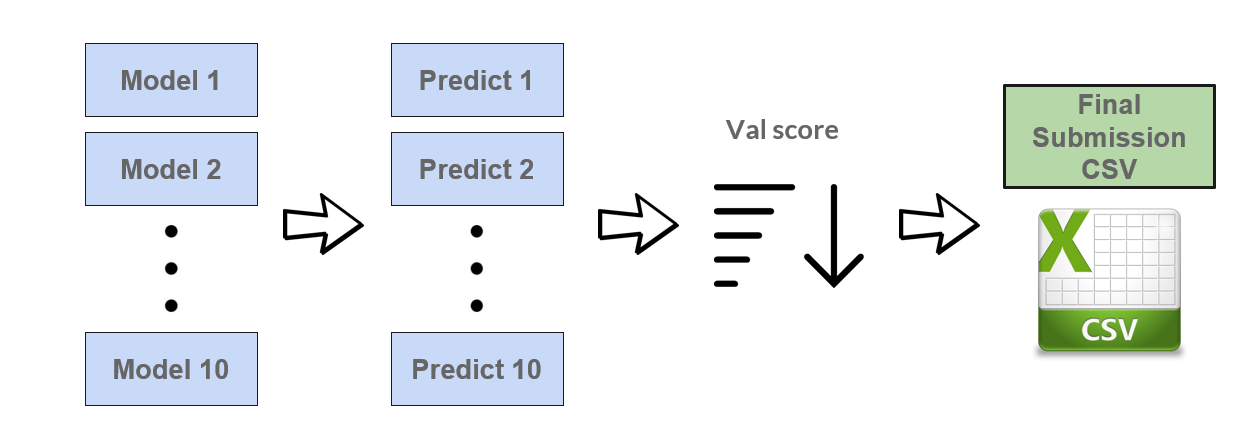

In [ ]:
model_0

Transformer(
  (src_word_embedding): Embedding(7750, 136)
  (src_position_embedding): Embedding(400, 136)
  (trg_word_embedding): Embedding(3704, 136)
  (trg_position_embedding): Embedding(50, 136)
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): _LinearWithBias(in_features=136, out_features=136, bias=True)
          )
          (linear1): Linear(in_features=136, out_features=8, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=8, out_features=136, bias=True)
          (norm1): LayerNorm((136,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((136,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAtten